# Allgemeine gewöhnliche Differentialgleichungen - Übungen

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'svg'
from scipy.integrate import odeint
import sympy as sp

Populating the interactive namespace from numpy and matplotlib


## Aufgaben

### Aufgabe ADG1: allgemeine und partikuläre Lösung

1. Zeigen Sie, dass die Funktion $y(x) = C\frac{x}{1 + x}$ die allgemeine Lösung der Differentialgleichung $x(1+x)y'(x) - y(x) = 0$ ist. Wie lautet die partikuläre Lösung zum Anfangswert $y(1)=8$? Erstellen Sie in Python einen Plot der partikulären Lösung.

2. Die Aufladung eines Kondensators der Kapazität $C$ ab dem Zeitpunkt $t=0$ über einen ohmschen Widerstand $R$ auf die Endspannung $u_0$ erfolgt nach dem Exponentialgesetz $u_C(t) = u_0 (1- e^{-\frac{t}{RC}})$. Skizzieren Sie die Funktion $u_C(t)$. Zeigen Sie, dass diese Funktion eine partikuläre Lösung der Differentialgleichung  $RC\dot{u_C}(t) + u_C(t) = u_0$ ist, die diesen Einschaltvorgang beschreibt. Erstellen Sie in Python Plots der Funktion $u_C(t)$ für verschiedene Werte von $C$ und $R$.

*Quellen:* 

1. Papula, Band 2, Kapitel IV Gewöhnliche Differentialgleichungen, Übungsaufgaben zu Abschnitt 1, Aufgabe 1
2. Papula, Band 2, Kapitel IV Gewöhnliche Differentialgleichungen, Übungsaufgaben zu Abschnitt 1, Aufgabe 3

### Aufgabe ADG2: Richtungsfeld, odeint

Erstellen Sie in Python Plots der Richtungsfelder folgender Differentialgleichungen. Berechnen Sie jeweils die Lösungskurven zum angegebenen Anfangswert mittels dem Befehl `odeint`, und zeichen sie diese in den Plot zusätzlich ein. Berechnen Sie mit SymPy jeweils den analytischen Ausdruck der allgemeinen Lösung.

1. $y'(x) = \frac{y(x)}{2(x+1)}$ für $x\geq 0$, Anfangswert $y(0)=2$
2. $\dot{y}(t) = \frac{t y(t)}{1 + t^2}$, Anfangswert $y(0)=3$

*Quelle:* Papula, Band 2, Kapitel IV Gewöhnliche Differentialgleichungen, Übungsaufgaben zu Abschnitt 2, Aufgabe 1

### Aufgabe ADG3: Trennung der Variablen

Lösen Sie folgende DGL mit der Methode der Trennung der Variablen und überprüfen Sie jeweils Ihre Ergebnisse am Computer mittels SymPy.

1. $y\dot{y} = te^t$
2. $\dot{y}(1 + t^2) = ty$

*Quellen:*

1. Goldstein, Lay, Asmar, Schneider: Calculus & Its Applications, p.516
2. Papula: Band 2, p.520

### Aufgabe ADG4: Integration exakter DGL

Überprüfen Sie, ob die DGL exakt ist, und lösen Sie das Anfangswertproblem. Überprüfen Sie Ihr Ergebnis am Computer mittels SymPy.

$$\dot{y} = \frac{-y^2}{2yt + 1}, \quad y(1)=-2$$

*Quelle:* Bronson: Schaum's "Differential Equations", p.36

### Aufgabe ADG5: Exaktheit, allgemeine Lösung, Anfangswertproblem

Gegeben ist die Differentialgleichung $y' = \frac{-2xy}{1 + x^2}$.

1. Überprüfen Sie, ob die DGL exakt ist.
2. Bestimmen Sie die allgemeine Lösung.
3. Lösen Sie das Anfangswertproblem zur Anfangsbedingung $y(2)=-5$.

*Quelle:* Bronson: Schaum's "Differential Equations", Aufgaben 5.2 und 5.11, S. 33 und 36

### Aufgabe ADG6: Anfangswertproblem

Lösen Sie das folgende Anfangswertproblem $yy' = \cos(2x), y(0) = -1$.

### Aufgabe ADG7: Integration exakter DGL

Ist die Differentialgleichung $\dot{y}(t) = \frac{t + \sin(y(t))}{2y(t) - t\cos(y(t))}$ exakt? Begründen Sie Ihre Antwort. Geben Sie die allgemeine Lösung der Differentialgleichung in impliziter Form an.

### Aufgabe ADG8: Quadratischer [Luftwiderstand](https://de.wikipedia.org/wiki/Fall_mit_Luftwiderstand)

Ein Auto mit Masse $m$ und Anfangsgeschwindigkeit $v_0$ bewegt sich nur unter dem Einfluss des als quadratisch von der Geschwindigkeit abhängig angenommenen Luftwiderstands.

1. Erklären Sie, warum die Geschwindigkeit $v(t)$ des Autos die DGL $\dot{v}(t) = -\frac{c}{m}v(t)^2$ erfüllt.
2. Lösen Sie das Anfangswertproblem und erstellen Sie einen Plot der Lösung in Python für vernünftige Werte der Parameter.

### Aufgabe ADG9: Anfangswertproblem

Lösen Sie das Anfangswertproblem

$$y' = \frac{-x}{y}, \; y(0)=1.$$

*Quelle:* Farlow: Introduction to Differential Equations. Example 3, p. 40f.

## Lösungen

### Lösung ADG1: allgemeine und partikuläre Lösung

Siehe `ADG1.jpg`.

1. partikuläre Lösung: $y(x) = 16\frac{x}{1 + x}$, Siehe Code.
2. Einsetzen. Siehe Code.

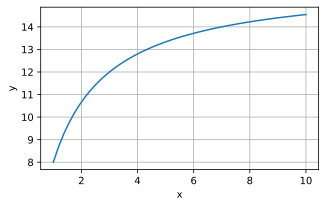

In [2]:
x = linspace(1, 10)
y = 16*x/(1 + x)

figure(figsize=(5,3))
plot(x, y)
xlabel('x')
ylabel('y')
grid(True)

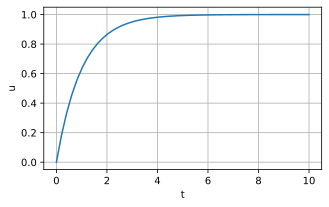

In [3]:
t = linspace(0, 10)
R = 1
C = 1
u0 = 1
u = u0*(1 - exp(-t/(R*C)))

figure(figsize=(5,3))
plot(t, u)
xlabel('t')
ylabel('u')
grid(True)

### Lösung ADG2:  Richtungsfeld, odeint

*Quelle:* Papula, Band 2, Kapitel IV Gewöhnliche Differentialgleichungen, Übungsaufgaben zu Abschnitt 2, Aufgabe 1

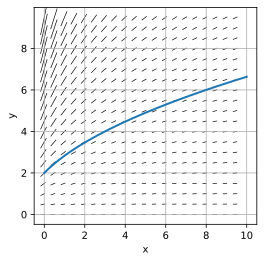

In [4]:
x = arange(0, 10, 0.5)
y = arange(0, 10, 0.5)
X, Y = meshgrid(x, y)

dX = ones(X.shape)
dY = 0.5*Y/(X+1)

def my_f(y, x):
    return 0.5*y/(x+1)

y0 = 2
x = linspace(0, 10)
y = odeint(my_f, y0, x)

figure(figsize=(4,4))
quiver(X, Y, dX, dY, headwidth=0.0, scale = 30, pivot = 'middle') # , angles='uv'
plot(x, y, linewidth=2)

#axis('equal')
xlabel('x')
ylabel('y')
grid(True)

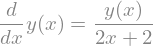

In [5]:
sp.init_printing()
x = sp.symbols('x')
y = sp.symbols('y', cls=sp.Function)
diffeq = sp.Eq(y(x).diff(x), y(x)/(2*(x+1)))
diffeq

In [6]:
sp.dsolve(diffeq, y(x))

In [7]:
sp.init_printing(False)

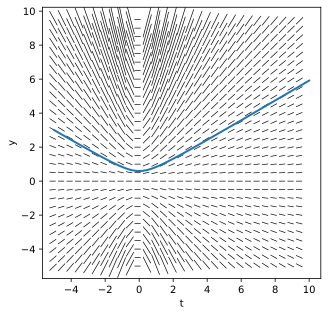

In [8]:
t = arange(-5, 10, .5)
y = arange(-5, 10, .5)
T, Y = meshgrid(t, y)

dT = ones(T.shape)
dY = T*Y/(1 + T**2)

def my_f(y, t):
    return t*y/(1 + t**2)

y0 = 3
t = linspace(-5, 10)
y = odeint(my_f, y0, t)

figure(figsize=(5,5))
quiver(T, Y, dT, dY, headwidth=0.0, scale=30, pivot='middle') # , angles='uv'
plot(t, y, linewidth=2)

axis('equal')
xlabel('t')
ylabel('y')
grid(False)

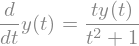

In [9]:
sp.init_printing()
t = sp.symbols('t')
y = sp.symbols('y', cls=sp.Function)
diffeq = sp.Eq(y(t).diff(t), t*y(t)/(1 + t**2))
diffeq

In [10]:
sp.dsolve(diffeq, y(t))

In [11]:
sp.init_printing(False)

### Lösung ADG3: Trennung der Variablen

Siehe `ADG3.jpg`.

In [12]:
t = sp.symbols('t')
y = sp.symbols('y', cls=sp.Function)

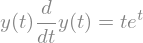

In [13]:
sp.init_printing()
diffeq = sp.Eq(y(t)*y(t).diff(t), t*sp.exp(t))
diffeq

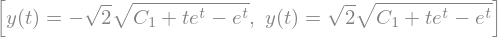

In [14]:
sp.dsolve(diffeq, y(t))

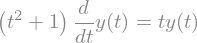

In [15]:
diffeq = sp.Eq(y(t).diff(t)*(1 + t**2), t*y(t))
diffeq

In [16]:
sp.dsolve(diffeq, y(t))

In [17]:
sp.init_printing(False)

### Lösung ADG4: Integration exakter DGL

Siehe `ADG4a.jpg` und `ADG4b.jpg` oder `ADG4.jpg`.

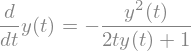

In [18]:
sp.init_printing(use_unicode=True)

diffeq = sp.Eq(y(t).diff(t), -y(t)**2/(2*y(t)*t + 1))
diffeq

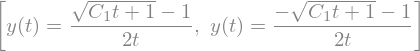

In [19]:
sp.dsolve(diffeq, y(t))

In [20]:
sp.init_printing(False)

### Lösung ADG5: Exaktheit, allgemeine Lösung, Anfangswertproblem

Siehe `ADG5.jpg`.

1. ist exakt
2. $y= C\frac{1}{1 + x^2}$
3. $y=\frac{-25}{x^2 + 1}$

### Lösung ADG6: Anfangswertproblem

Siehe `ADG6.jpg`.

$y(x) = -\sqrt{\sin(2x) + 1}$

### Lösung ADG7: Integration exakter DGL

Siehe `ADG7.jpg`.

$\frac{t^2}{2} + t\sin(y) - y^2 = c$

### Lösung ADG8: Quadratischer [Luftwiderstand](https://de.wikipedia.org/wiki/Fall_mit_Luftwiderstand)

Siehe `ADG8.jpg`.

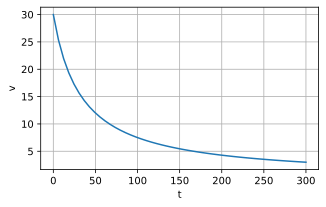

In [21]:
t = linspace(0, 60*5) # seconds
v0 = 30               # meters per second
m = 1000              # kg
c = 1.0

v = v0/(1 + c*v0/m*t)

figure(figsize=(5,3))
plot(t, v)
xlabel('t')
ylabel('v')
grid(True)

### Lösung ADG9: Anfangswertproblem

Siehe `ADG9.jpg`.

ist exakt, $y=\sqrt{1 - x^2}$

## Kurztestfragen

1. Klassifizieren Sie die DGL $y'' + xy + y^2=0$.
2. Lösen Sie $xy' = y^2$ durch Trennen der Variablen.
3. Beschreiben Sie die Vorgehensweise bei der Lösung exakter Differentailgleichungen.
4. Klassifizieren Sie die Differentialgleichung $y'' + xy' + y^2 = 0$.
5. Was ist ein Richtungsfeld und welchen Nutzen hat es?
6. Klassifizieren Sie die Differentialgleichung $y'' + x^2y' + y = \sin(x)$.
7. Beschreiben Sie die Vorgehensweise bei der Lösung von Differentialgleichungen durch Trennen der Variablen.
8. Klassifizieren Sie folgende Differentialgleichungen: (a) $y''(x) + x^2y'(x)=0$, (b) $\dot{x}(t) + 3x(t) = \sin(t)$
9. Lösen Sie $xy'(x)=y(x)$ durch Trennen der Variablen.
10. Klassifizieren Sie folgende Differentialgleichungen: (a) $\frac{\partial T}{\partial t} = a\frac{\partial^2 T}{\partial x^2}$, (b) $\ddot{x}(t)=-2x(t)$
11. Beschreiben Sie die Vorgehensweise bei der Lösung exakter Differentialgleichungen.
13. Lösen Sie das folgende Anfangswertproblem durch Separation der Variablen: $yy'=\sin(2x),~y(\pi/2)=1$
14. Erklären Sie die Vorgehensweise zum Lösen einer Differentialgleichung durch Integration des zugehörigen Differentials entlang eines beliebigen Weges. Welche Voraussetzung gibt es, dass diese Methode durchgeführt werden kann?.

## Programmierprojekte

### Logistische Bevölkerungsentwicklung

Der Bevölkerungszuwachs pro Zeiteinheit zu einem Zeitpunkt $t$ wird mit $\dot{P}(t)$ bezeichnet. Er ist proportional zum Bevölkerungsstand $P(t)$, da mehr Individuen umso mehr Kinder bekommen. Diese Annahme führt zum GDGL-Modell $\dot{P}(t) = kP(t)$ mit exponentieller Lösung $P(t)=P(0)e^{kt}$. Dieses Modell beinhaltet nicht die Begrenztheit von Lebensresourcen. Sein unbeschränkter Anstieg ist daher nicht realistisch. 
Man muss für ein realistischeres Modell somit zusätzliche Einflüsse einbauen, die das exponentielle Wachstum umso mehr verhindern, je größer der Bevölkerungsstand wird. Die sogenannte *logistische Gleichung*

$$\dot{P}(t) = kP(t) - \epsilon P^2(t)$$

verwendet die ersten beiden Terme einer Taylorreihe in $P(t)$ und erreicht das oben formulierte Ziel. Sie fittet reale Daten erstaunlich gut und wird daher oft angewandt, siehe [Logistische_Funktion](https://de.wikipedia.org/wiki/Logistische_Funktion) und [Logistic_function#Applications](https://en.wikipedia.org/wiki/Logistic_function#Applications).

**Aufgaben:**

1. Auf welchen steady state Wert strebt die Population $P(t)$ für große Zeiten $t$ hin, wenn sie die logistische Gleichung erfüllt? Hinweis: Setzen Sie die Ableitung in der GDGL auf Null, und lösen Sie die resultierende Gleichung.

2. Fitten Sie eine logistische Funktion an die Bevölkerungsanzahlen der U.S.A. von 1945 bis 1999. Verwenden Sie dazu die Daten aus der Datei `us_pop.csv`. Stellen Sie den Fit graphisch dar. Welche optimalen Werte für die Parameter $k$ und $\epsilon$ erhalten Sie, und welcher steady state ergibt sich daraus? Datenquelle: [United States Census Bureau](http://www.census.gov/), Tabelle [Historical National Population Estimates](http://www2.census.gov/programs-surveys/popest/tables/1900-1980/national/totals/popclockest.txt)

3. Lösen Sie mit den oben kalibrierten Parameterwerten $k$ und $\epsilon$ die zugehörige GDGL numerisch am Computer. Verwenden Sie als Anfangswert die Bevölkerungsanzahl von 1945. Stellen Sie das Ergebnis inkl. dem steady state Wert graphisch dar.

*Abgabe:* Hochladen eines IPython-Notebooks als ipynb-Datei in ILIAS.

**Lösung:**

Literatur: MacCluer: Industrial Mathematics. §9.2 p. 126f., Ex. 9.16 p. 143

Steady state Werte: $P(t)=0$ und $P(t)=\frac{k}{\epsilon}$

In [22]:
D = genfromtxt('daten/us_pop.csv', skip_header=2, delimiter=',')
ind = argsort(D[:,0])
D = D[ind]

In [23]:
# ab 1945 in Mio:
years   = D[30:,0]
pop_mio = D[30:,1]/1e6

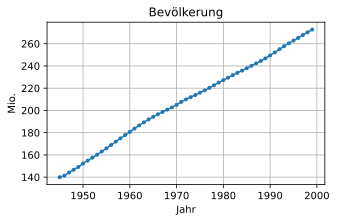

In [24]:
figure(figsize=(5,3))
plot(years, pop_mio, '.-')
title('Bevölkerung')
xlabel('Jahr')
ylabel('Mio.')
grid(True)

In [25]:
A = stack((pop_mio[1:], pop_mio[1:]**2), axis=1)
b = diff(pop_mio)

In [26]:
x_hat = lstsq(A, b, rcond=None)[0]
k   =  x_hat[0]
eps = -x_hat[1]

print("k   = {0:.12f}".format(k))
print("eps = {0:.12f}".format(eps))

pop_inf = k/eps
print("Population carrying capacity = {0:.2f} Mio.".format(pop_inf))

k   = 0.026384997054
eps = 0.000067876647
Population carrying capacity = 388.72 Mio.


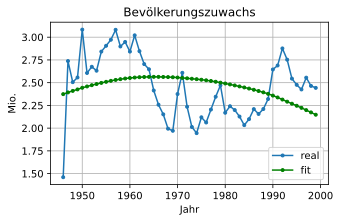

In [27]:
pop_mio_diff_fit = k*pop_mio - eps*pop_mio**2
figure(figsize=(5,3))
plot(years[1:], diff(pop_mio)       , '.-', label='real')
plot(years[1:], pop_mio_diff_fit[1:], '.-g', label='fit')
title('Bevölkerungszuwachs')
xlabel('Jahr')
ylabel('Mio.')
legend(loc='best')
grid(True)

In [28]:
# Definition der Ableitungsfunktion:
def fun(p, t): # Achtung! Die Reihenfolge der Argumente muss (y, x) sein.
    return k*p - eps*p**2

# A sequence of time points for which to solve for y. 
# The initial value point should be the first element of this sequence.
t = arange(1945, 2200, 1) 

# The initial value:
p0 = pop_mio[0]

# Solve numerically with odeint:
p_num = odeint(fun, p0, t)

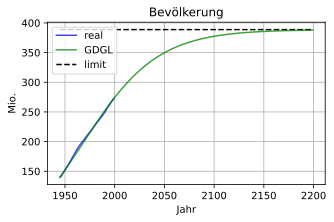

In [29]:
figure(figsize=(5,3))
plot(years, pop_mio, '-b', alpha=0.75, label='real')
plot(t    , p_num  , '-g', alpha=0.75, label='GDGL')
hlines(pop_inf, min(t), max(t), linestyle='--',  label='limit')
title('Bevölkerung')
xlabel('Jahr')
ylabel('Mio.')
legend(loc='best')
grid(True)